In [23]:
# type: ignore
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification 
import numpy as np 
import matplotlib.pyplot as plt

In [24]:
# 1. Tạo dataset giả lập (phân loại nhị phân) 
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42) 
# 2. Chia tập dữ liệu thành train (80%) và validation (20%) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

In [25]:
#3. Xây dựng mô hình MLP đơn giản
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) # Lớp đầu vào
model.add(Dense(32, activation='relu')) # Lớp ẩn
model.add(Dense(1, activation='sigmoid')) # Lớp đầu ra cho phân loại nhị phân
# 4. Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 5. Huấn luyện mô hình với dữ liệu train và validate đồng thời
history = model.fit(
    X_train, y_train,
    epochs=20, # Số lượng epoch
    batch_size=32, # Kích thước batch
    validation_data=(X_val, y_val), # Sử dụng tập validation
    verbose=1 # Hiển thị chi tiết quá trình huấn luyện
    )

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5143 - loss: 0.7197 - val_accuracy: 0.7100 - val_loss: 0.6093
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7621 - loss: 0.5468 - val_accuracy: 0.7750 - val_loss: 0.5035
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8378 - loss: 0.4267 - val_accuracy: 0.8250 - val_loss: 0.4184
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8737 - loss: 0.3575 - val_accuracy: 0.8400 - val_loss: 0.3788
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8911 - loss: 0.2968 - val_accuracy: 0.8400 - val_loss: 0.3654
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8882 - loss: 0.2823 - val_accuracy: 0.8500 - val_loss: 0.3553
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8994 - loss: 0.2762 - val_accuracy: 0.8500 - val_loss: 0.3596
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8937 - loss: 0.2554 - val_accuracy: 0.8650 - val_loss:

In [26]:
# Đánh giá mô hình trên tập validation sau huấn luyện 
val_loss, val_accuracy = model.evaluate(X_val, y_val) 
print(f"Validation Loss: {val_loss:.4f}") 
print(f"Validation Accuracy: {val_accuracy:.4f}") 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.8168 - loss: 0.4129
Validation Loss: 0.3751
Validation Accuracy: 0.8500


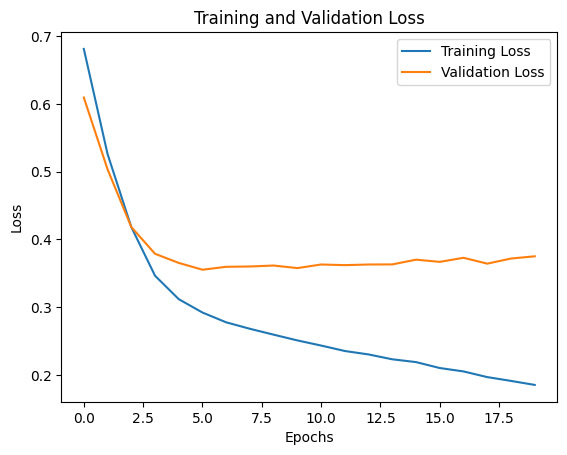

In [27]:
# Vẽ đồ thị Loss (mất mát) giữa train và validation 
plt.plot(history.history['loss'], label='Training Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title('Training and Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

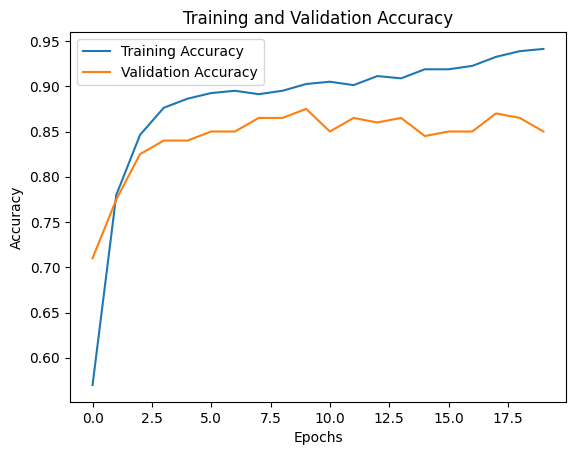

In [28]:
# Vẽ đồ thị Accuracy (độ chính xác) giữa train và validation 
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Training and Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()

In [ ]:
# 4. Xây dựng mô hình MLP với 7 lớp ẩn, 100 neuron và Dropout
model_7_layers = Sequential()
model_7_layers.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Lớp đầu vào

# Thêm 7 lớp ẩn với 100 neuron và Dropout
model_7_layers.add(Dense(100, activation='relu'))
model_7_layers.add(Dropout(0.3))  # Dropout 30%

model_7_layers.add(Dense(100, activation='relu'))
model_7_layers.add(Dropout(0.3))

model_7_layers.add(Dense(100, activation='relu'))
model_7_layers.add(Dropout(0.3))

model_7_layers.add(Dense(100, activation='relu'))
model_7_layers.add(Dropout(0.3))

model_7_layers.add(Dense(100, activation='relu'))
model_7_layers.add(Dropout(0.3))

model_7_layers.add(Dense(100, activation='relu'))
model_7_layers.add(Dropout(0.3))

model_7_layers.add(Dense(100, activation='relu'))
model_7_layers.add(Dropout(0.3))

# Lớp đầu ra cho phân loại nhị phân
model_7_layers.add(Dense(1, activation='sigmoid'))

# 4. Compile mô hình
model_7_layers.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Huấn luyện mô hình với dữ liệu train và validate đồng thời
history_7_layers = model_7_layers.fit(
    X_train, y_train,
    epochs=20,  # Số lượng epoch
    batch_size=32,  # Kích thước batch
    validation_data=(X_val, y_val),  # Sử dụng tập validation
    verbose=1  # Hiển thị chi tiết quá trình huấn luyện
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5055 - loss: 0.6922 - val_accuracy: 0.6400 - val_loss: 0.6637
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5772 - loss: 0.6549 - val_accuracy: 0.8000 - val_loss: 0.5159
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7695 - loss: 0.5215 - val_accuracy: 0.8450 - val_loss: 0.3861
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8629 - loss: 0.3883 - val_accuracy: 0.8300 - val_loss: 0.3769
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8525 - loss: 0.3733 - val_accuracy: 0.8500 - val_loss: 0.3733
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8484 - loss: 0.4087 - val_accuracy: 0.8550 - val_loss: 0.3449
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8941 - loss: 0.3177 - val_accuracy: 0.8650 - val_loss: 0.3404
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8973 - loss: 0.2747 - val_accuracy: 0.8600 - val_loss:

In [30]:
#Đánh giá mô hình trên tập validation sau huấn luyện 
val_loss, val_accuracy = model_7_layers.evaluate(X_val, y_val) 
print(f"Validation Loss: {val_loss:.4f}") 
print(f"Validation Accuracy: {val_accuracy:.4f}") 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8298 - loss: 0.5933 
Validation Loss: 0.5807
Validation Accuracy: 0.8500


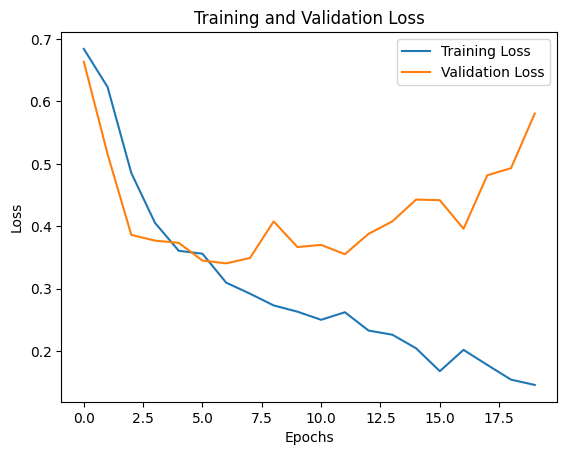

In [31]:
# Vẽ đồ thị Loss (mất mát) giữa train và validation 
plt.plot(history_7_layers.history['loss'], label='Training Loss') 
plt.plot(history_7_layers.history['val_loss'], label='Validation Loss') 
plt.title('Training and Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

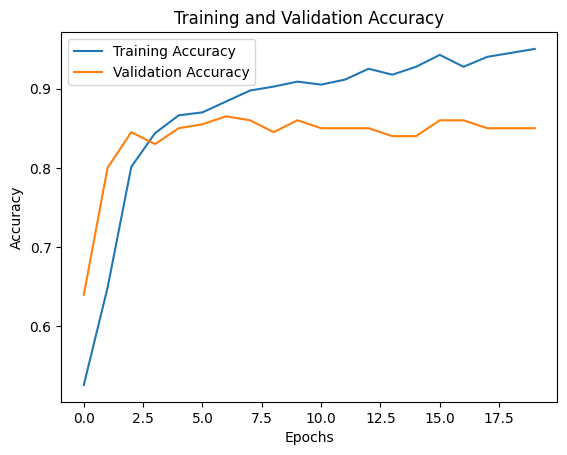

In [32]:
# Vẽ đồ thị Accuracy (độ chính xác) giữa train và validation 
plt.plot(history_7_layers.history['accuracy'], label='Training Accuracy') 
plt.plot(history_7_layers.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Training and Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()

In [33]:
# 5. CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model_cnn = Sequential()
model_cnn.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(64, 3, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(128, 3, activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(1, activation='linear'))

model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_cnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3617 - mae: 0.5130 - val_loss: 0.1987 - val_mae: 0.4267
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1989 - mae: 0.4091 - val_loss: 0.1451 - val_mae: 0.3187
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1440 - mae: 0.3102 - val_loss: 0.1419 - val_mae: 0.2973
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1227 - mae: 0.2768 - val_loss: 0.1250 - val_mae: 0.2739
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1070 - mae: 0.2568 - val_loss: 0.1182 - val_mae: 0.2795
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1201 - mae: 0.2720 - val_loss: 0.1192 - val_mae: 0.2566
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1007 - mae: 0.2367 - val_loss: 0.1462 - val_mae: 0.2892
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0961 - mae: 0.2278 - val_loss: 0.1153 - val_mae: 0.2583
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0774 - mae: 0.2028 - va

In [34]:
#6. RNN
from tensorflow.keras.layers import SimpleRNN

model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_rnn.add(SimpleRNN(64, activation='relu', return_sequences=True))
model_rnn.add(SimpleRNN(128, activation='relu'))
model_rnn.add(Dense(100, activation='relu'))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(1, activation='linear'))

model_rnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.2606 - mae: 0.4236 - val_loss: 0.1567 - val_mae: 0.3238
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1415 - mae: 0.2931 - val_loss: 0.1348 - val_mae: 0.3000
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1186 - mae: 0.2737 - val_loss: 0.1270 - val_mae: 0.2866
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1171 - mae: 0.2715 - val_loss: 0.1552 - val_mae: 0.2916
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1166 - mae: 0.2529 - val_loss: 0.1224 - val_mae: 0.2569
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0903 - mae: 0.2162 - val_loss: 0.1144 - val_mae: 0.2429
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0794 - mae: 0.1984 - val_loss: 0.1148 - val_mae: 0.2495
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0804 - mae: 0.2081 - val_loss: 0.1181 - val_mae: 0.2393
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0679 - mae: 0.1882 - v

In [35]:
#7. LSTM
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(64, activation='relu', return_sequences=True))
model_lstm.add(LSTM(128, activation='relu'))
model_lstm.add(Dense(100, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1, activation='linear'))

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3690 - mae: 0.4704 - val_loss: 0.2603 - val_mae: 0.4988
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2626 - mae: 0.5014 - val_loss: 0.2365 - val_mae: 0.4806
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2498 - mae: 0.4894 - val_loss: 0.2489 - val_mae: 0.4876
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2466 - mae: 0.4802 - val_loss: 0.2367 - val_mae: 0.4791
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2461 - mae: 0.4811 - val_loss: 0.2464 - val_mae: 0.4840
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2501 - mae: 0.4864 - val_loss: 0.2279 - val_mae: 0.4664
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2353 - mae: 0.4715 - val_loss: 0.2271 - val_mae: 0.4646
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2327 - mae: 0.4621 - val_loss: 0.2271 - val_mae: 0.4389
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2281 - mae: 0.

In [36]:
#So sánh, đánh giá 3 mô hình với 7_layer với các độ đo MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Tính toán các độ đo cho từng mô hình
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Đánh giá mô hình MLP 7_layer
mae_mlp, mse_mlp, rmse_mlp = evaluate_model(model, X_val, y_val)
# Đánh giá mô hình CNN
mae_cnn, mse_cnn, rmse_cnn = evaluate_model(model_cnn, X_val, y_val)
# Đánh giá mô hình RNN
mae_rnn, mse_rnn, rmse_rnn = evaluate_model(model_rnn, X_val, y_val)
# Đánh giá mô hình LSTM
mae_lstm, mse_lstm, rmse_lstm = evaluate_model(model_lstm, X_val, y_val)

# So sánh các độ đo
print("MLP 7_layer - MAE:", mae_mlp, ", MSE:", mse_mlp, ", RMSE:", rmse_mlp)
print("CNN - MAE:", mae_cnn, ", MSE:", mse_cnn, ", RMSE:", rmse_cnn)
print("RNN - MAE:", mae_rnn, ", MSE:", mse_rnn, ", RMSE:", rmse_rnn)
print("LSTM - MAE:", mae_lstm, ", MSE:", mse_lstm, ", RMSE:", rmse_lstm)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
MLP 7_layer - MAE: 0.19044872307931654 , MSE: 0.10995035071981729 , RMSE: 0.3315876214815886
CNN - MAE: 0.26248039852827787 , MSE: 0.13397602563290748 , RMSE: 0.3660273563996378
RNN - MAE: 0.19996312022209167 , MSE: 0.10273936352314239 , RMSE: 0.3205298169018639
LSTM - MAE: 0.39580174306407573 , MSE: 0.18903880237588588 , RMSE: 0.4347859270674315


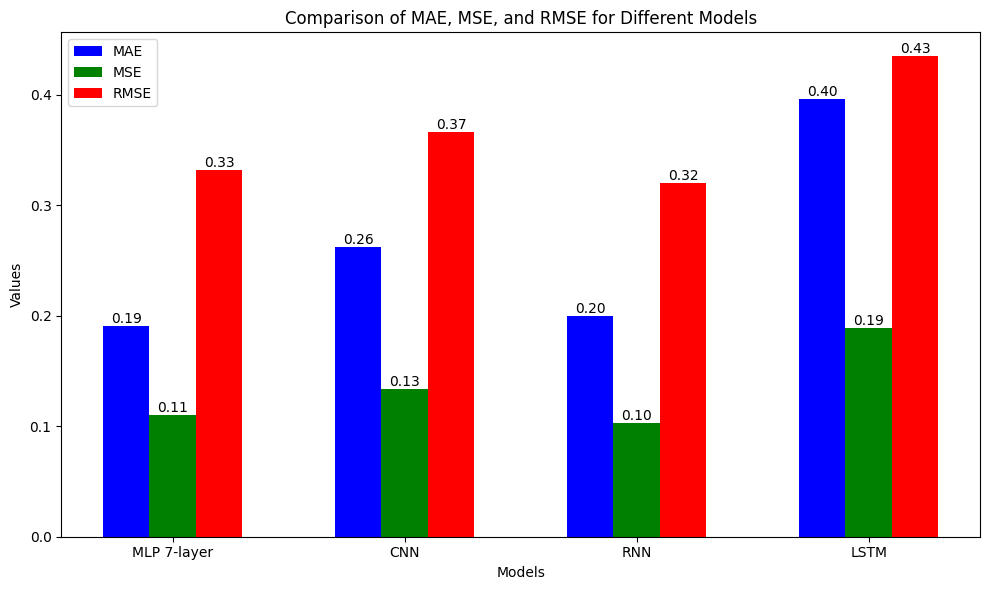

In [37]:
# Các độ đo cho từng mô hình
models = ['MLP 7-layer', 'CNN', 'RNN', 'LSTM']
mae_values = [mae_mlp, mae_cnn, mae_rnn, mae_lstm]
mse_values = [mse_mlp, mse_cnn, mse_rnn, mse_lstm]
rmse_values = [rmse_mlp, rmse_cnn, rmse_rnn, rmse_lstm]

# Vẽ biểu đồ so sánh MAE, MSE, RMSE
x = np.arange(len(models))  # Tạo vị trí cho các mô hình

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2  # Chiều rộng của thanh bar
index = np.arange(len(models))

# Vẽ các thanh bar cho mỗi độ đo
bar1 = ax.bar(index - bar_width, mae_values, bar_width, label='MAE', color='b')
bar2 = ax.bar(index, mse_values, bar_width, label='MSE', color='g')
bar3 = ax.bar(index + bar_width, rmse_values, bar_width, label='RMSE', color='r')

# Thêm nhãn và tiêu đề
ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Comparison of MAE, MSE, and RMSE for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Hiển thị giá trị của các thanh bar
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
                ha='center', va='bottom', fontsize=10)

add_values(bar1)
add_values(bar2)
add_values(bar3)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
